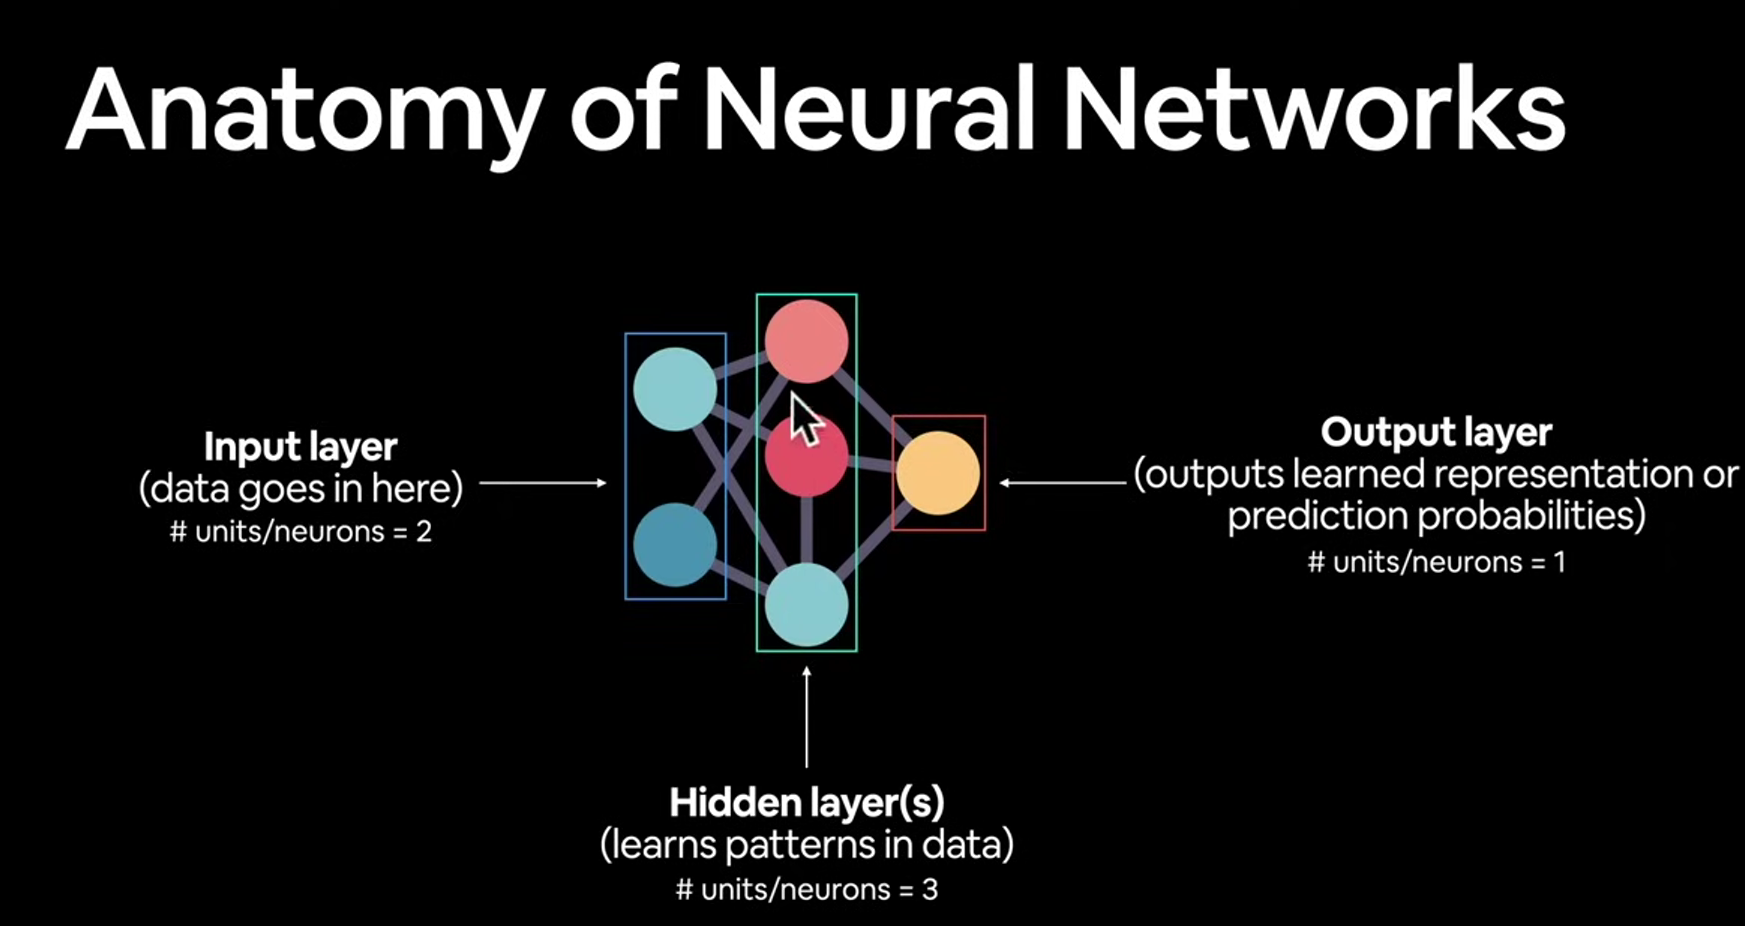

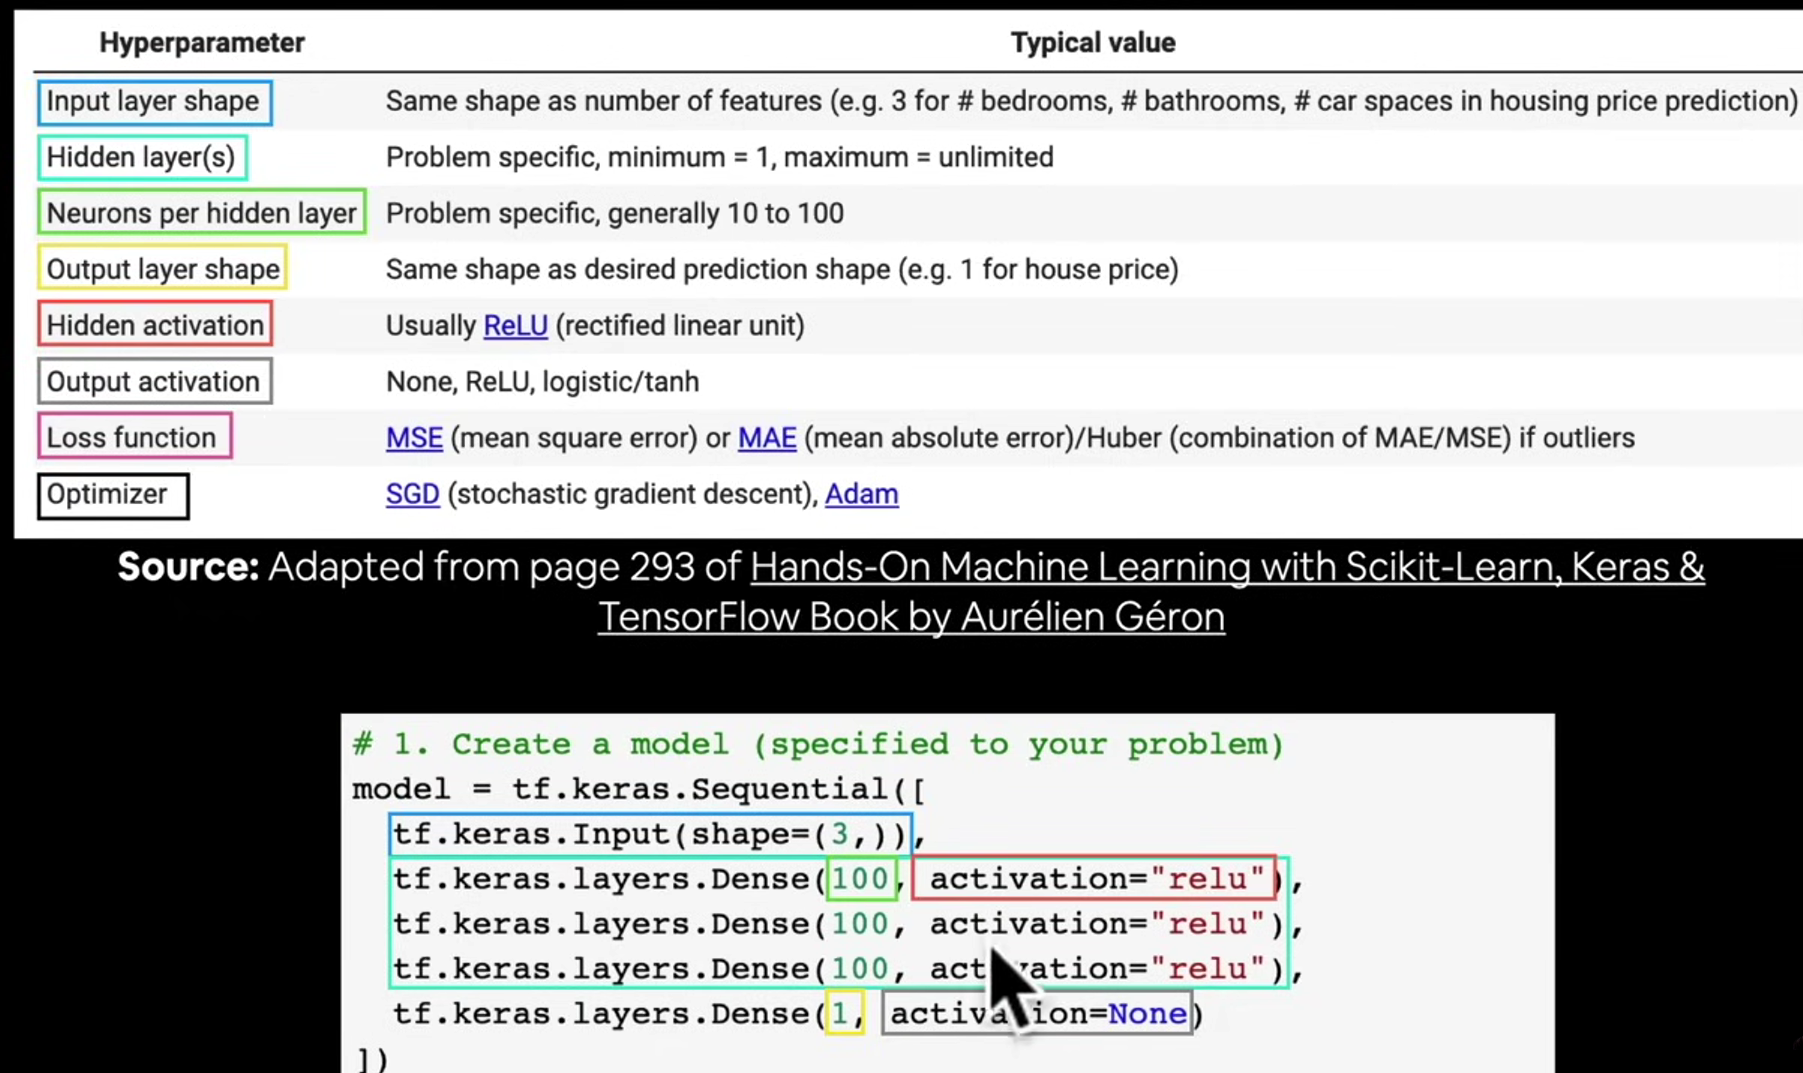

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in out case, we are going to simplify it : predicting a numerical variable based on some other combination of variables,even shorter....predicting a number !!

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


# Creating data to view and fit

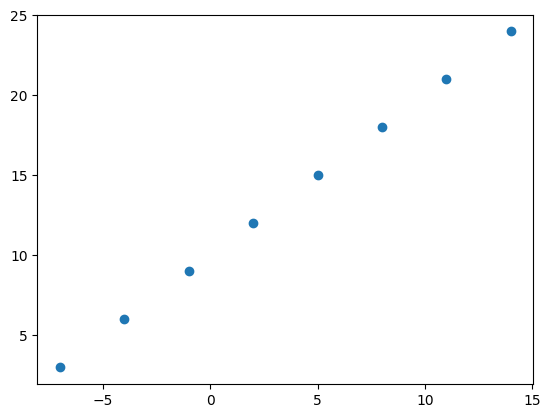

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([-7,-4,-1,2,5,8,11,14])
y=np.array([ 3  ,6  ,9 ,12 ,15 ,18 ,21, 24])

plt.scatter(x,y)

### So we are wanting that our model learns this pattern between x & y

In [3]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

In [4]:
# create a demo tensor for our housing price prediction oroblem
house_info=tf.constant(["bedrooms","bathroom","garage"])
house_price=tf.constant([300000])
house_info,house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrooms', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([300000], dtype=int32)>)

In [5]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

**So we are basically handling scalers here that's why we are getting empty brackets only**

In [6]:
x[0].ndim

0

In [7]:
x[0],y[0]

(np.int64(-7), np.int64(3))

In [8]:
# Turn our Numpy arrays into Tensors
x=tf.constant(x,dtype=tf.float32)
y=tf.constant(y,dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

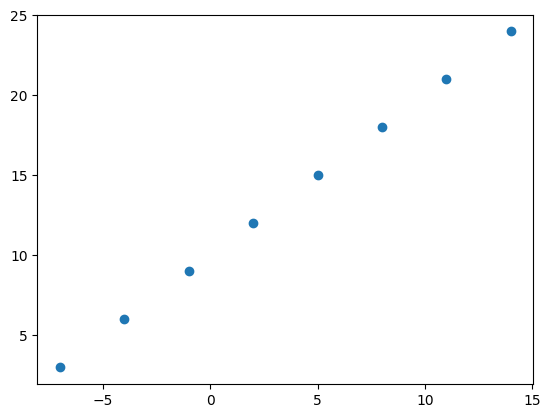

In [10]:
plt.scatter(x,y)

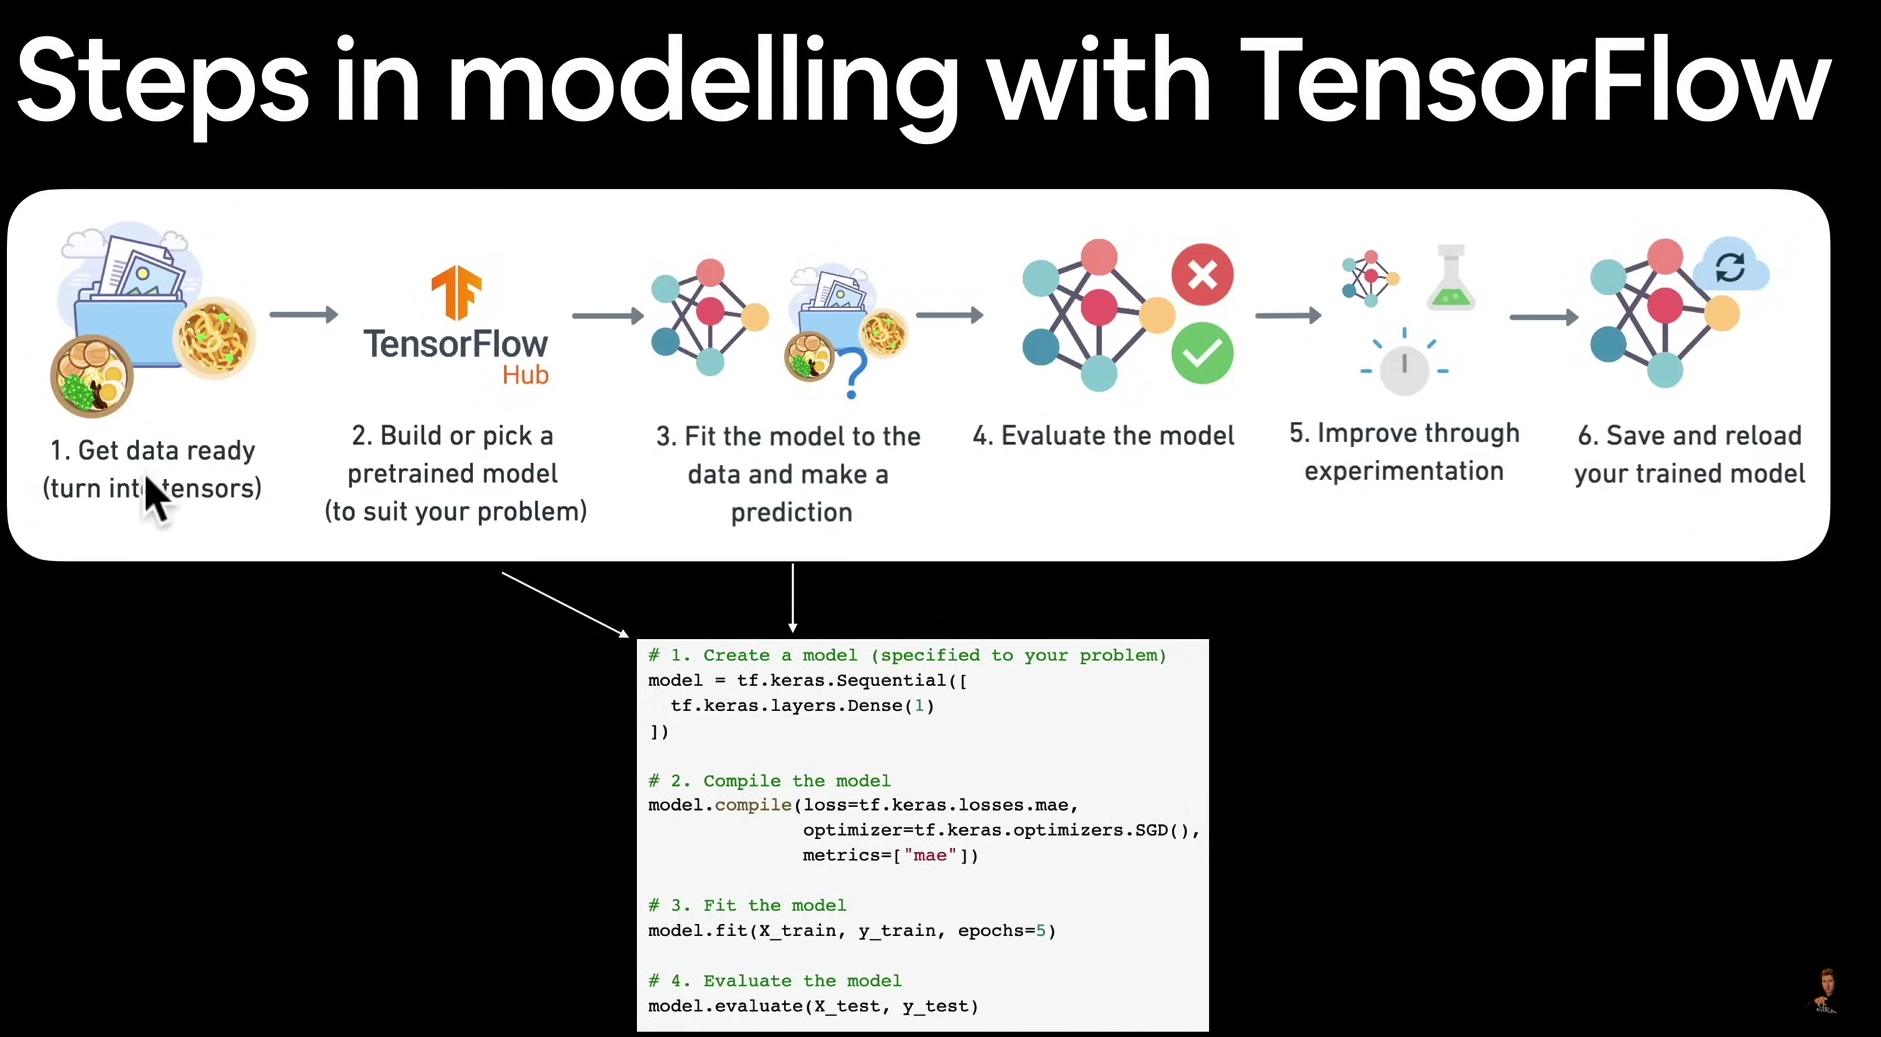

# Steps in modelling with Tensorflow
- creating a model -> define the `input-output layers`,as well as the hidden layers of a deep learning model
- compiling a model -> define the `loss function`(in other words,the function which tells our model how wrong it is) and the `optimizer`(tells our model how to improve the pattern its learning) and `evaluation metrics`(what we can use to interpret the performance of our model)
- `fitting a model` -> letting the model try to find patterns between x & y (features and labels)

In [11]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8,input_shape=(16,)))
...

model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Alternate ways

In [12]:
# Turn our Numpy arrays into Tensors
x=tf.constant(x,dtype=tf.float32)
y=tf.constant(y,dtype=tf.float32)
x = tf.reshape(x, shape=(-1, 1))
y = tf.reshape(y, shape=(-1, 1))
x,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [13]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model => means : we are ready to use the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd = Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=5) # 5 means i'm giving you chance to go through 5 times to learn

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - loss: 9.3849 - mae: 9.3849
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 9.2524 - mae: 9.2524
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.1199 - mae: 9.1199
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.9874 - mae: 8.9874
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.8549 - mae: 8.8549


In [14]:
# Check out X and Y
x ,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [15]:
y_pred=model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [16]:
y_pred+8.5

array([[31.512623]], dtype=float32)

# Improving Our Model

## Key : Experiment -> Experiment -> Experiment

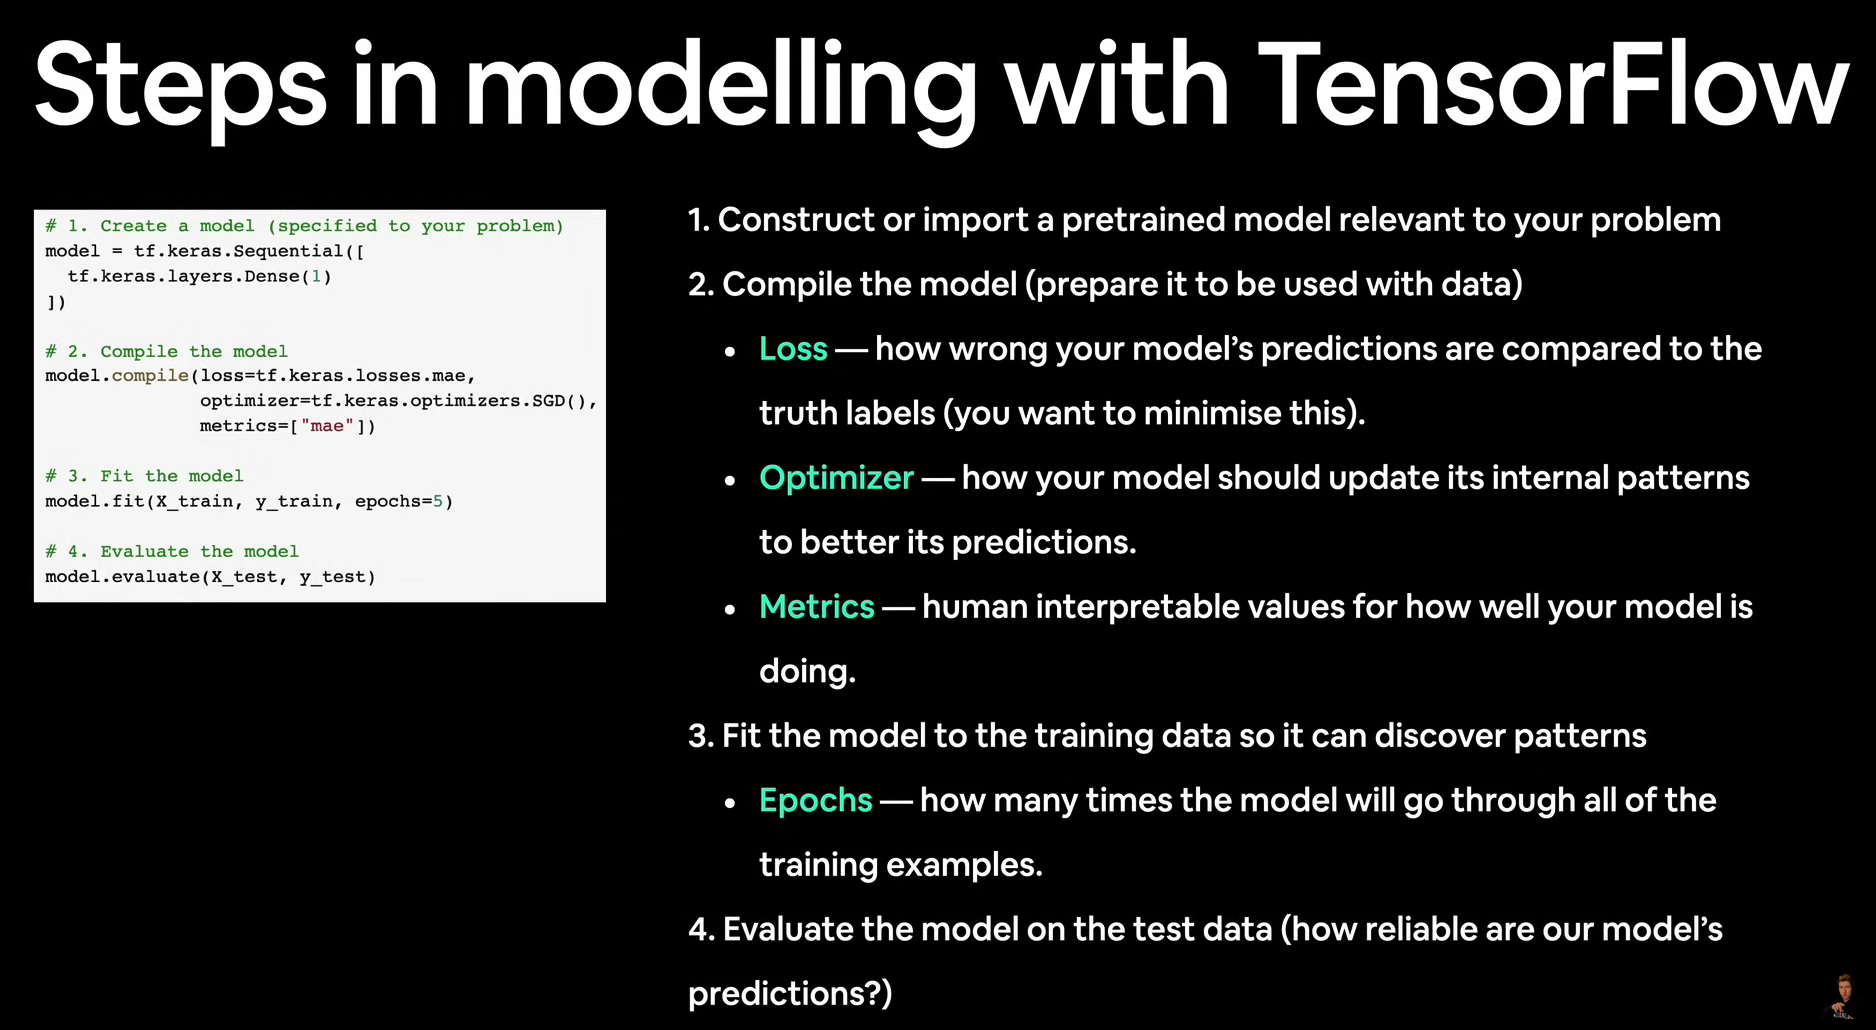

In [17]:
# Turn our Numpy arrays into Tensors
x=tf.constant(x,dtype=tf.float32)
y=tf.constant(y,dtype=tf.float32)
x = tf.reshape(x, shape=(-1, 1))
y = tf.reshape(y, shape=(-1, 1))
x,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [18]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model => means : we are ready to use the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd = Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=8) # 5 means i'm giving you chance to go through 5 times to learn

Epoch 1/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step - loss: 19.7925 - mae: 19.7925
Epoch 2/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 19.5113 - mae: 19.5113
Epoch 3/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 19.2300 - mae: 19.2300
Epoch 4/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 18.9488 - mae: 18.9488
Epoch 5/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 18.6675 - mae: 18.6675
Epoch 6/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 18.3863 - mae: 18.3863
Epoch 7/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 18.1050 - mae: 18.1050
Epoch 8/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 17.8238 - mae: 17.8238


In [19]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


array([[-15.60434]], dtype=float32)

> Here are two interesting rank 4 tensors. You can replace the example data with your own data to visualize model improvements.

In [20]:
# Define the first interesting rank-4 tensor
tensor_1 = tf.constant([
    [[[1, 2, 3, 4],
      [5, 6, 7, 8]],

     [[9, 10, 11, 12],
      [13, 14, 15, 16]]],


    [[[17, 18, 19, 20],
      [21, 22, 23, 24]],

     [[25, 26, 27, 28],
      [29, 30, 31, 32]]]
], dtype=tf.float32)

print("Tensor 1:")
print(tensor_1)
print("Shape of Tensor 1:", tensor_1.shape)
print("Rank of Tensor 1:", tf.rank(tensor_1))

Tensor 1:
tf.Tensor(
[[[[ 1.  2.  3.  4.]
   [ 5.  6.  7.  8.]]

  [[ 9. 10. 11. 12.]
   [13. 14. 15. 16.]]]


 [[[17. 18. 19. 20.]
   [21. 22. 23. 24.]]

  [[25. 26. 27. 28.]
   [29. 30. 31. 32.]]]], shape=(2, 2, 2, 4), dtype=float32)
Shape of Tensor 1: (2, 2, 2, 4)
Rank of Tensor 1: tf.Tensor(4, shape=(), dtype=int32)


In [21]:
# Define the second interesting rank-4 tensor
tensor_2 = tf.constant([
    [[[10, 20],
      [30, 40],
      [50, 60]],

     [[70, 80],
      [90, 100],
      [110, 120]]],


    [[[130, 140],
      [150, 160],
      [170, 180]],

     [[190, 200],
      [210, 220],
      [230, 240]]]
], dtype=tf.float32)

print("Tensor 2:")
print(tensor_2)
print("Shape of Tensor 2:", tensor_2.shape)
print("Rank of Tensor 2:", tf.rank(tensor_2))

Tensor 2:
tf.Tensor(
[[[[ 10.  20.]
   [ 30.  40.]
   [ 50.  60.]]

  [[ 70.  80.]
   [ 90. 100.]
   [110. 120.]]]


 [[[130. 140.]
   [150. 160.]
   [170. 180.]]

  [[190. 200.]
   [210. 220.]
   [230. 240.]]]], shape=(2, 2, 3, 2), dtype=float32)
Shape of Tensor 2: (2, 2, 3, 2)
Rank of Tensor 2: tf.Tensor(4, shape=(), dtype=int32)


Since we don't have true labels for `tensor_1` and `tensor_2`, we can't directly calculate accuracy on them. However, we can demonstrate how changing model parameters affects the training process on our original `x` and `y` data. This illustrates how different parameters can influence the model's ability to learn the underlying pattern, which is crucial for improving accuracy on new data.

Let's try training the model with more epochs and then with an additional dense layer to see how the training loss changes.

Training with 100 epochs:


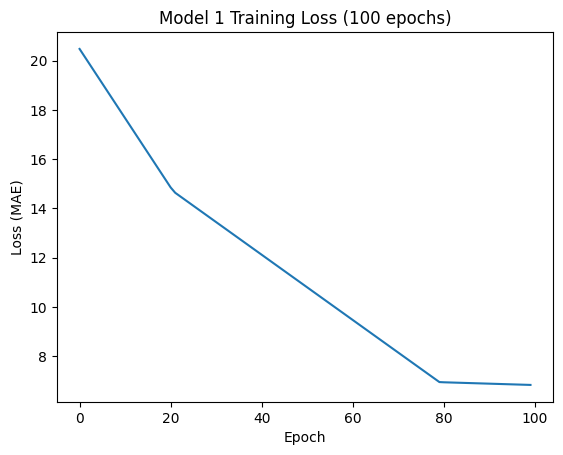


Prediction with Model 1 (100 epochs) for x=17.0:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
[[29.73264]]


In [22]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model with one dense layer
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model with more epochs
print("Training with 100 epochs:")
history_1 = model_1.fit(x, y, epochs=100, verbose=0) # verbose=0 to keep output clean

# Plot the training loss
plt.plot(history_1.history['loss'])
plt.title('Model 1 Training Loss (100 epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.show()

# Make a prediction with this model
print("\nPrediction with Model 1 (100 epochs) for x=17.0:")
print(model_1.predict(tf.constant([17.0])))

Training Model 2 with 100 epochs (two layers, Adam optimizer):


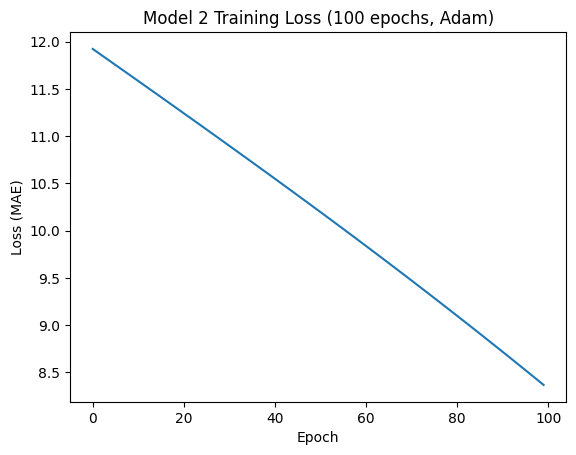


Prediction with Model 2 (two layers, Adam) for x=17.0:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[[22.904821]]


In [23]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model with two dense layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]), # Added a hidden layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model (using Adam optimizer this time)
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
print("Training Model 2 with 100 epochs (two layers, Adam optimizer):")
history_2 = model_2.fit(x, y, epochs=100, verbose=0) # verbose=0 to keep output clean

# Plot the training loss
plt.plot(history_2.history['loss'])
plt.title('Model 2 Training Loss (100 epochs, Adam)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.show()

# Make a prediction with this model
print("\nPrediction with Model 2 (two layers, Adam) for x=17.0:")
print(model_2.predict(tf.constant([17.0])))

As you can see from the loss plots, training for more epochs and adding layers (along with potentially changing the optimizer) can significantly reduce the training loss, indicating the model is learning the pattern better. This improved learning on the training data generally leads to better accuracy on unseen data as well.

To truly measure the impact of parameter changes on accuracy, you would typically split your data into training and testing sets, train on the training set, and evaluate on the testing set using metrics like MAE or MSE.

## 🚀 How Can We Improve Our Current Model?

If you guessed "by tweaking some of the steps we’ve already taken" — you’re absolutely right.

To enhance our model’s performance, we can refine nearly every stage of the modeling pipeline:

### 1. **Creating the Model**
- Add more layers to increase model depth.
- Increase the number of hidden units (neurons) per layer.
- Experiment with different activation functions.

### 2. **Compiling the Model**
- Try different optimization algorithms.
- Adjust the learning rate for better convergence.

### 3. **Fitting the Model**
- Train for more epochs to allow deeper learning.
- Use more training data to help the model generalize better.

Each adjustment has the potential to boost performance — but remember, it’s all about experimentation and evaluation.


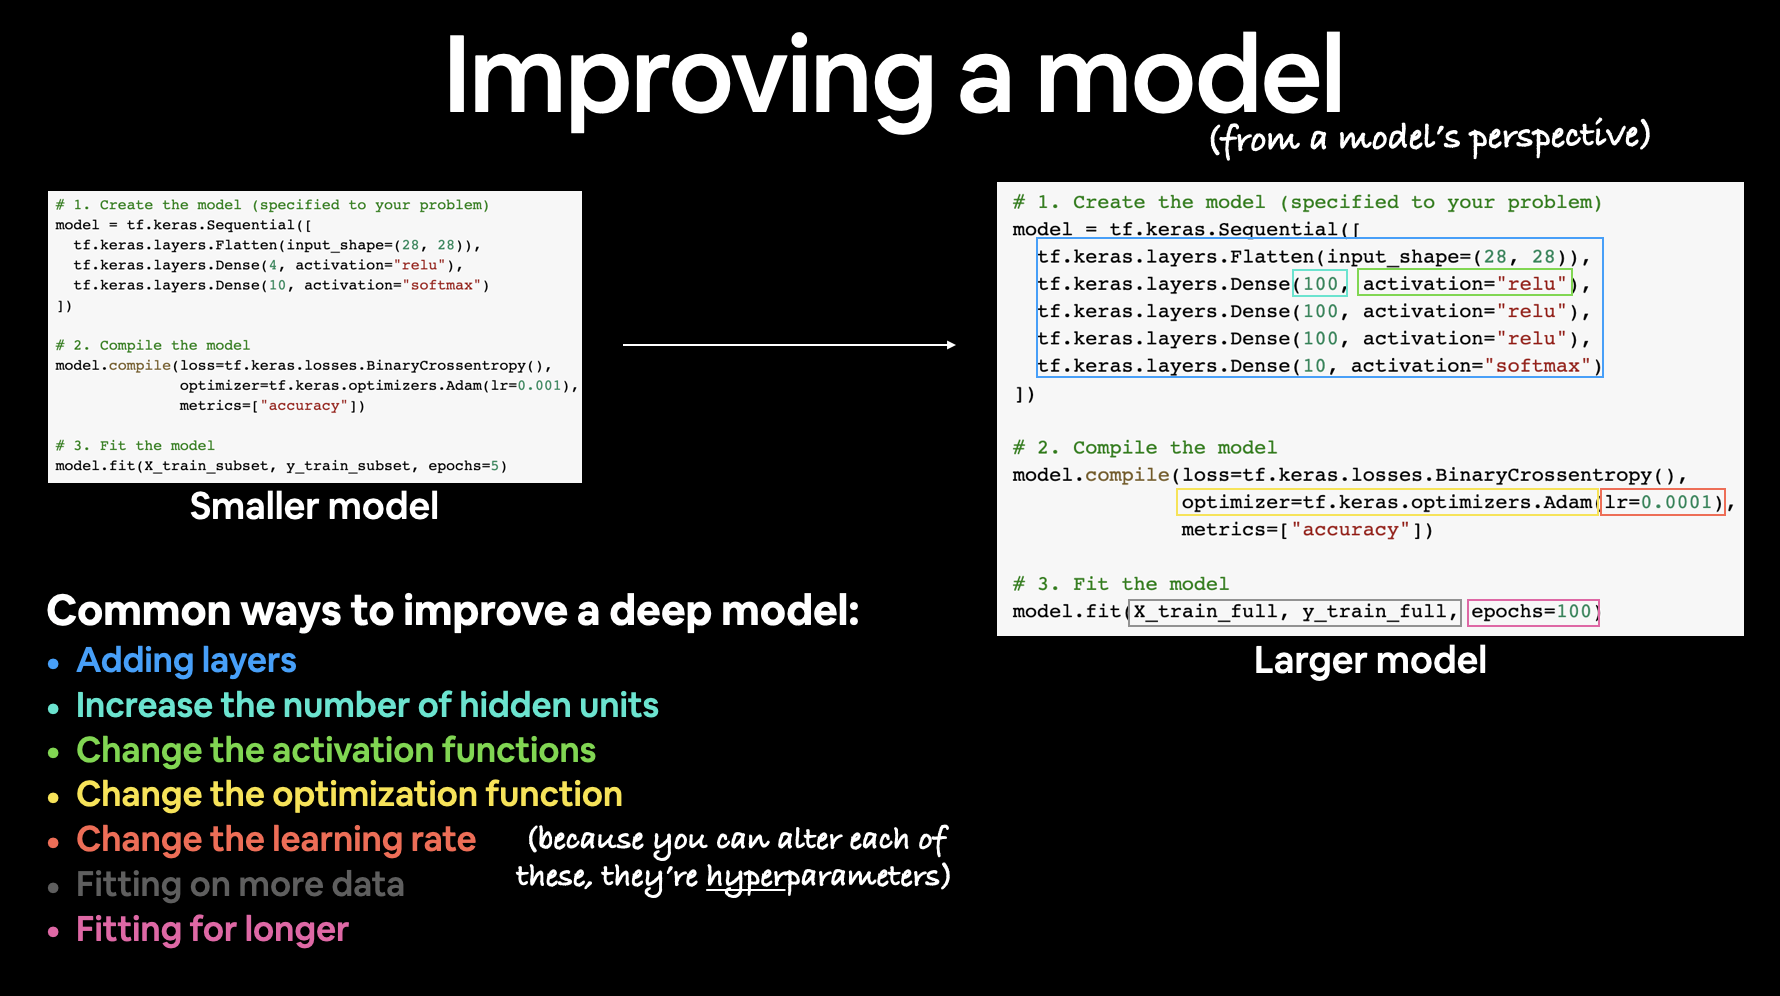

There are many different ways to potentially improve a neural network. Some of the most common include: `increasing the number of layers` (making the network deeper), `increasing the number of hidden units` (making the network wider) and `changing the learning rate`. Because these values are all human-changeable, they're referred to as `hyperparameters`) and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [24]:
# Reshape x to be 2D
x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
x = tf.expand_dims(x, axis=1)  # Now shape = (8, 1)

# y remains the same
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Trying out some basic Model 1

In [25]:
# Lets rebuild our model

# Rebuild and fit model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step - loss: 9.4261 - mae: 9.4261
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.2936 - mae: 9.2936
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 9.1611 - mae: 9.1611
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.0286 - mae: 9.0286
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 8.8961 - mae: 8.8961
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.7636 - mae: 8.7636
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.6311 - mae: 8.6311
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.4986 - mae: 8.4986
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.3661 - mae: 8.3661
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.2336 - mae: 8.2336
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.1011 - mae: 8.1011
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.9686 - mae: 7.9686
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/st

In [26]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[30.097315]], dtype=float32)

In [27]:
# Lets rebuild our model

# Rebuild and fit model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step - loss: 14.5867 - mae: 14.5867
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 14.0559 - mae: 14.0559
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.5375 - mae: 13.5375
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 13.0273 - mae: 13.0273
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.5179 - mae: 12.5179
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.0099 - mae: 12.0099
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.4934 - mae: 11.4934
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.9714 - mae: 10.9714
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.4550 - mae: 10.4550
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.9144 - mae: 9.9144
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 9.3533 - mae: 9.3533
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.7574 - mae: 8.7574
Epoch 13/100
1/1 ━━━━━━━━━━━━━

In [28]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


array([[32.497578]], dtype=float32)

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# Step 3: Compile the model
model.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# Step 4: Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.1631 - mae: 13.1631
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.5302 - mae: 7.5302
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 14.6821 - mae: 14.6821
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.3346 - mae: 11.3346
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.0804 - mae: 7.0804
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 9.4028 - mae: 9.4028
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 10.6737 - mae: 10.6737
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 10.8313 - mae: 10.8313
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.3595 - mae: 10.3595
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.5219 - mae: 9.5219
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 8.4268 - mae: 8.4268
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.0575 - mae: 7.0575
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [30]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


array([[26.575443]], dtype=float32)

Here we were expecting 27 but we're getting far from it !

So basically the `mae` we see during training isn't real representation of situation all the time

> Learning Rate is the most important hyperparameter among which we are using

##  Evaluating a Model :
 `Visualize, Visualize, Visualize!`

Why?  
>Because in machine learning, seeing is often more powerful than just thinking. Visual feedback helps you understand, debug, and improve models much faster.


### 📊 What Should You Visualize?

- **The Data**  
  Understand what you’re working with. What does the data actually look like?

- **The Model Architecture**  
  Get a clear picture of the model’s layers, shapes, and flow.

- **The Training Process**  
  Track how the model is learning over time — is it improving? Overfitting?

- **The Predictions**  
  Compare model outputs against actual labels. Are predictions making sense?


###  Let’s Begin with Visualizing the Model

In [31]:
# making a larger dataset
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [32]:
# make labels for the dataset
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

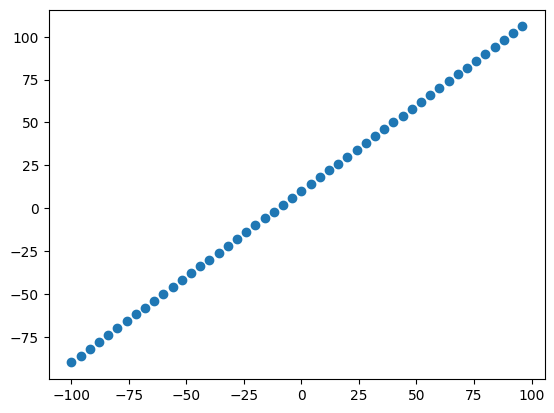

In [33]:
 plt.scatter(x,y)

# Split the data into traininf/test set

### 3 sets...
 - **Training set** ==> 70-80 % of total data available
 - **Validation set** ==> 10-15% of the data
 - **Test set** ==> model gets evaluated on this data(10-15% of the total data)

In [34]:
# checking the length of how many samples we have
len(x)

50

In [35]:
# split the data into train test sets
x_train=x[:40]
x_test=x[40:]

x_train = tf.reshape(x_train, (-1, 1)).numpy()  # shape: (8, 1)
x_test = tf.reshape(x_test, (-1, 1)).numpy()


In [36]:
y_train=y[:40].numpy()
y_test=y[40:].numpy()

In [37]:
len(x_train),len(x_test),len(y_train),len(y_test)

(40, 10, 40, 10)

# Visualising the data


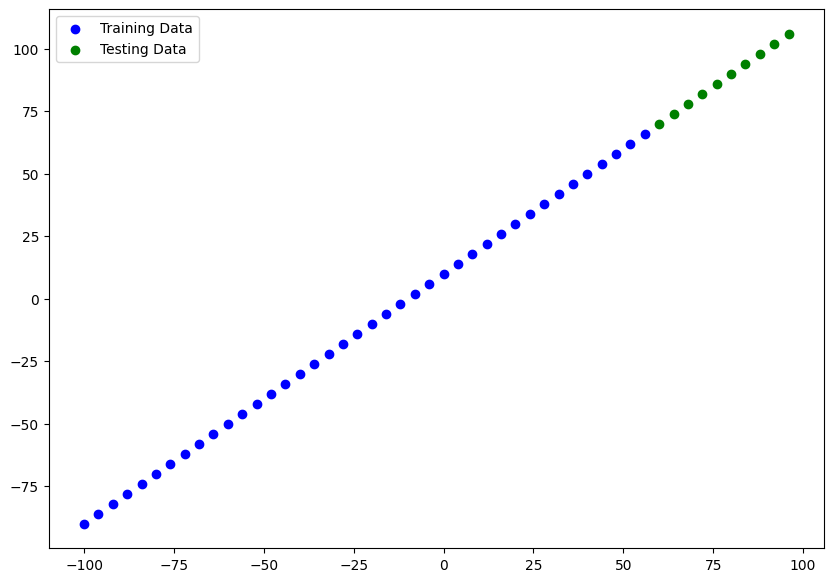

In [38]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,c="b",label="Training Data")
plt.scatter(x_test,y_test,c="g",label="Testing Data")
plt.legend()

In [39]:
# x = tf.reshape(x, (-1, 1)).numpy()  # shape: (8, 1)
# y = y.numpy()

In [40]:
# lets have a look at how to build a neural network for our data
# 1. create a model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])
# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3 Fit a Model
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - loss: 103.3424 - mae: 103.3424
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 68.1742 - mae: 68.1742
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 33.2484 - mae: 33.2484
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.1309 - mae: 8.1309
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.7829 - mae: 10.7829 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.2796 - mae: 10.2796
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.0557 - mae: 12.0557
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.6736 - mae: 12.6736
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.1901 - mae: 8.1901
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.8447 - mae: 8.8447
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.7928 - mae: 7.7928
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.7619 - mae: 10.7619 
Epoch 13/100
2/2 ━━━━━━━━━━━

# Visualizing Model

In [41]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [42]:
model.build()

In [43]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [44]:
x[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [45]:
# lets create a model which builds automatically by specifying input_shape argument
tf.random.set_seed(42)
# 1. create a model (same as above)
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]) # as its scalar passing 1 as input_shape to our model
    ])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
# model.fit(x_train,y_train,epochs=100)


In [46]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

calling summary() on our model shows us the layers it contains,the output shape and the number of parameters.

- `Total params` -total number of parameters in the model
- `Trainable parameters` - these are the parameters(patterns)the model can update as it trains
- `Non-trainable parameters` - these parameters arent updated during training(this is typical when you bring in the already learned patterns from other models during `transfer learning`).

# Weights and Biases

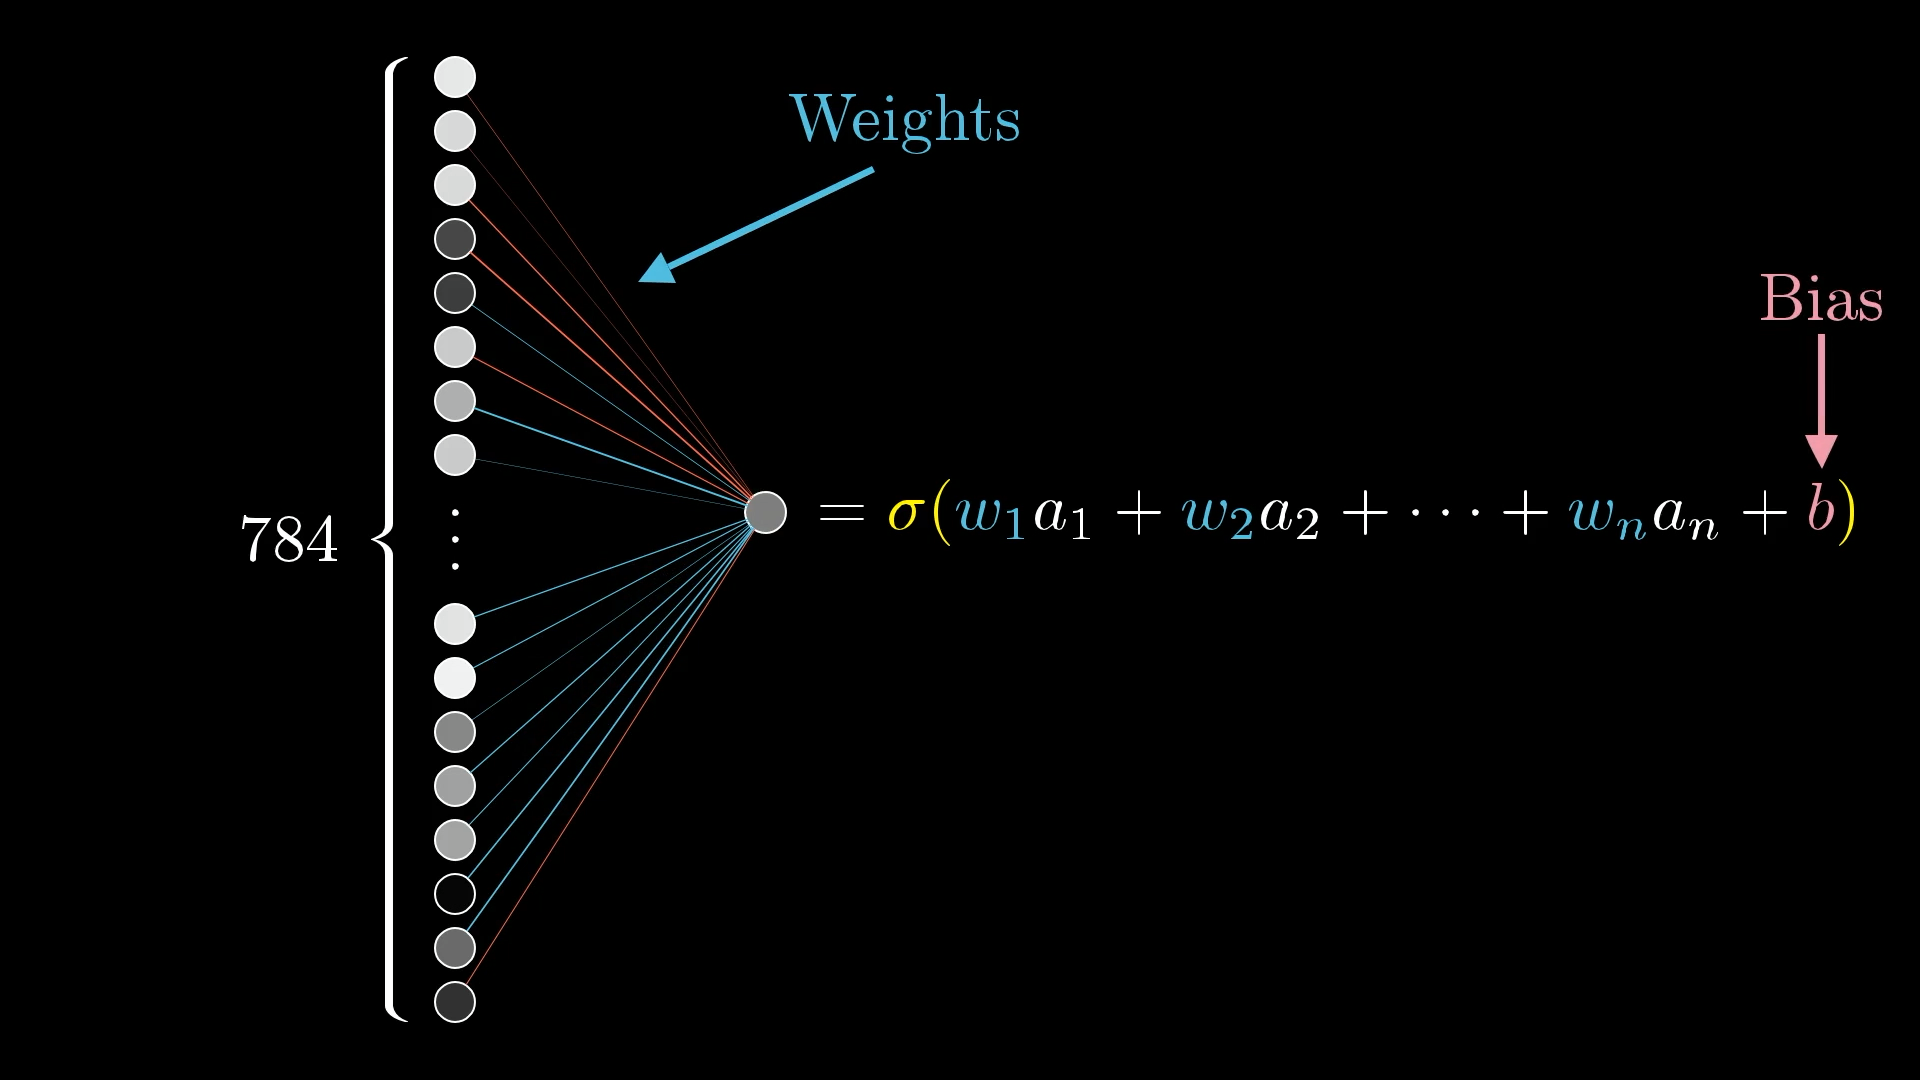

**> `🛠 Exercise:` Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

> Changing the number of hidden units in a `Dense` layer (e.g., `Dense(2)` → `Dense(3)`) **increases the number of trainable parameters** because each unit has its own **weights and bias**.

**Formula:**
For a `Dense layer`:
**Trainable params = (input\_units × output\_units) + output\_units**

So, increasing output units increases:

* the number of weights (connections from input),
* the number of biases (one per unit).

That’s why Total/Trainable params increase.


In [47]:
model.fit(x_train, y_train, epochs=20,verbose=0)

In [48]:
# Get a summary of our model
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Another way of visualising the models


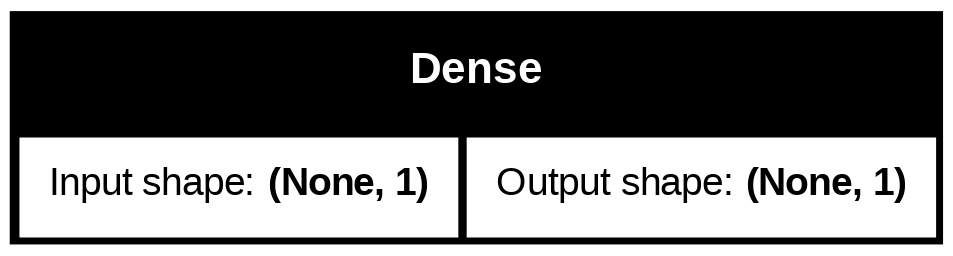

In [49]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

# Visualising our Model Predictions

To visualise predictions ,its a good idea to plot them against the ground truth labels

often you'll see this in the form of `y_test` or `y_true`(ground truth) vs `y_pred`

In [50]:
y_pred=model.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[51.823215],
       [55.26143 ],
       [58.699642],
       [62.137856],
       [65.57607 ],
       [69.01428 ],
       [72.4525  ],
       [75.89072 ],
       [79.328926],
       [82.76714 ]], dtype=float32)

In [51]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)

In [52]:
# create a plotting function
import matplotlib.pyplot as plt

def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()



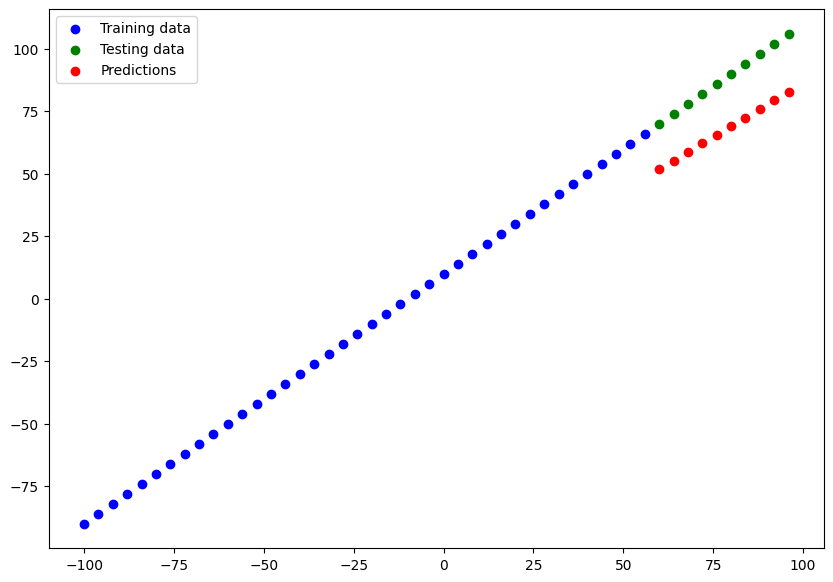

In [53]:
plot_predictions()

# Evaluation Metrics

* MAE - mean absolute error `on average ,how wrong is each of my model's prediction`
* MSE - mean square error `square the average errors`

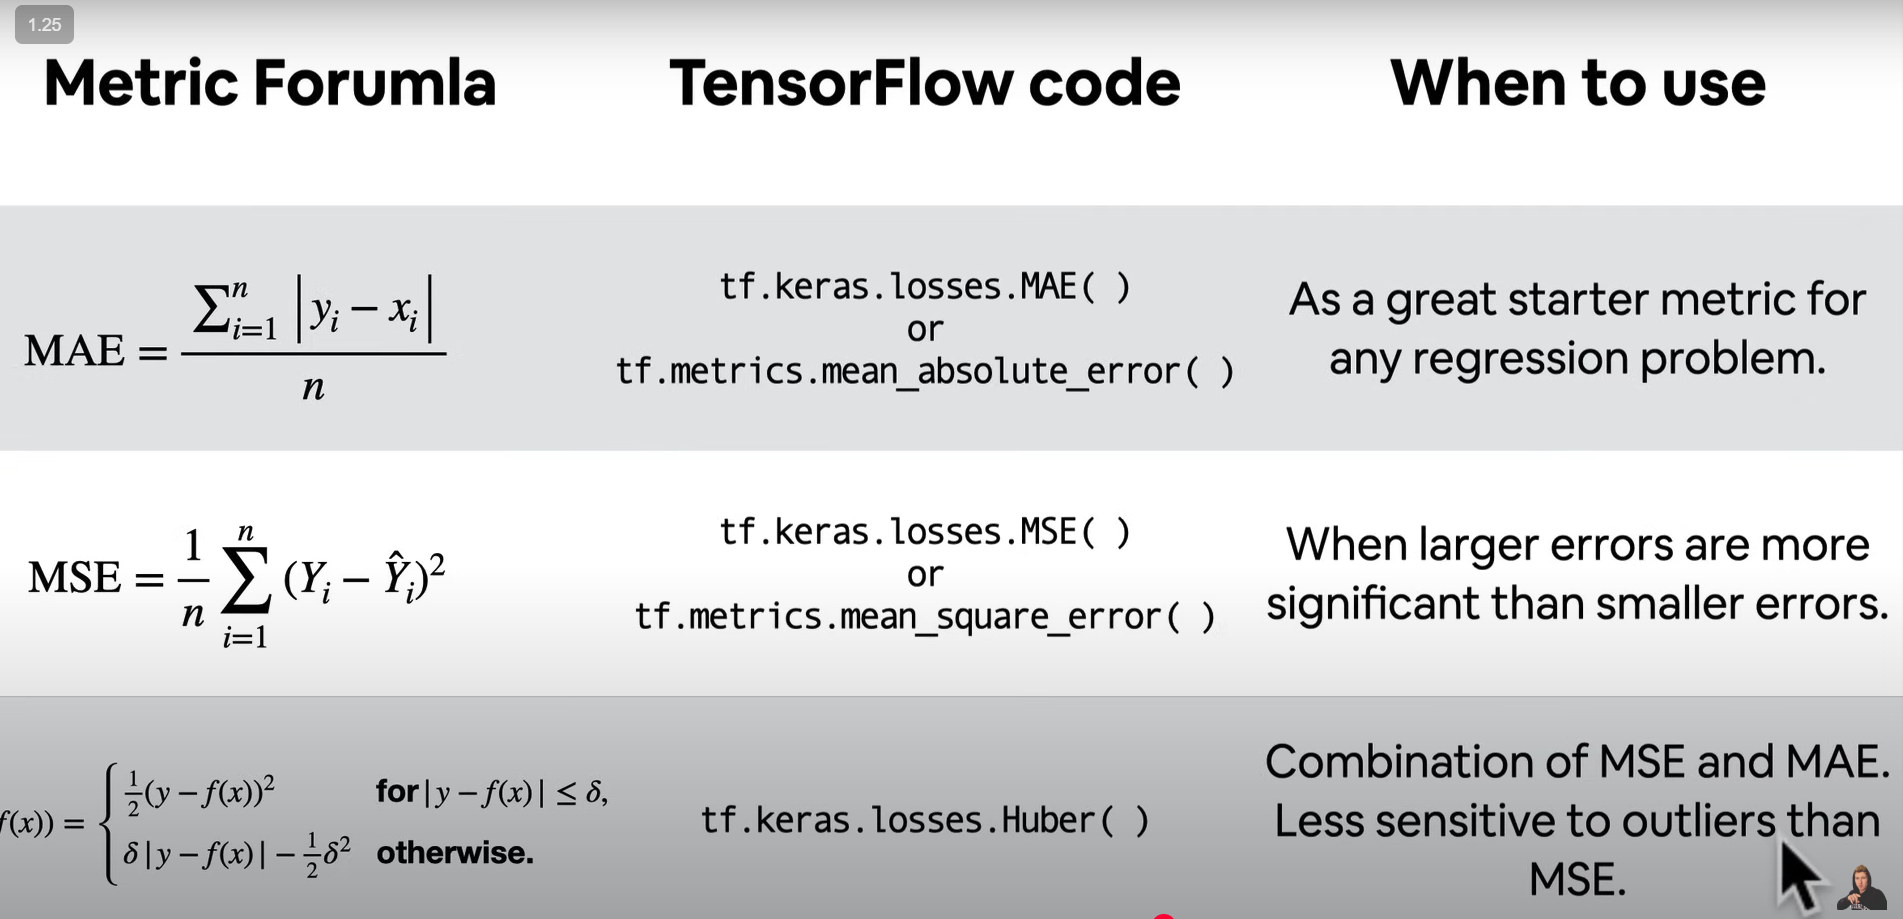

In [54]:
x_test.shape,y_test.shape

((10, 1), (10,))

In [55]:
# Evaluate the model on the test
model.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 20.7048 - mae: 20.7048


[20.704822540283203, 20.704822540283203]

In [56]:
y_pred

array([[51.823215],
       [55.26143 ],
       [58.699642],
       [62.137856],
       [65.57607 ],
       [69.01428 ],
       [72.4525  ],
       [75.89072 ],
       [79.328926],
       [82.76714 ]], dtype=float32)

In [57]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)

# Mean Absolute Error

In [58]:
mae=tf.keras.losses.MAE(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.176785, 18.738571, 19.300358, 19.862144, 20.423927, 20.985718,
       21.5475  , 22.109283, 22.671074, 23.232857], dtype=float32)>

Or,

In [59]:
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_test, y_pred)
result = mae.result().numpy()
print("Mean Absolute Error:", result)

Mean Absolute Error: 20.704823


In [60]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[51.823215],
       [55.26143 ],
       [58.699642],
       [62.137856],
       [65.57607 ],
       [69.01428 ],
       [72.4525  ],
       [75.89072 ],
       [79.328926],
       [82.76714 ]], dtype=float32)>

In [61]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)

In [62]:
y_pred

array([[51.823215],
       [55.26143 ],
       [58.699642],
       [62.137856],
       [65.57607 ],
       [69.01428 ],
       [72.4525  ],
       [75.89072 ],
       [79.328926],
       [82.76714 ]], dtype=float32)

In [63]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([51.823215, 55.26143 , 58.699642, 62.137856, 65.57607 , 69.01428 ,
       72.4525  , 75.89072 , 79.328926, 82.76714 ], dtype=float32)>

### Mean  Square Error

In [64]:
mse= tf.keras.losses.MSE(y_test,y_pred)
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([330.3955 , 351.13406, 372.5038 , 394.5048 , 417.1368 , 440.40036,
       464.29477, 488.8204 , 513.9776 , 539.7656 ], dtype=float32)>

In [65]:
y_pred.shape,y_test.shape

((10, 1), (10,))

In [66]:
# Make some functions to reuse MAE and MSE
def mae(y_test, y_pred):
    metric = tf.keras.metrics.MeanAbsoluteError()
    metric.update_state(y_test, y_pred)
    return metric.result().numpy()

def mse(y_test, y_pred):
    metric = tf.keras.metrics.MeanSquaredError()
    metric.update_state(y_test, y_pred)
    return metric.result().numpy()


### Running experiments to improve our model
```
Build a model -> fit it -> evaluate it -> tweak it -> fit it ->evaluate it ...
```

1. Get more data - get more examples for the model to train on !
2. Make your model larger(using a more complex model) - this might come in the form of more layers or more hidden units in each layer
3. Train for longer -  give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments :
1. `Model 1 :` same as the original model,1 layer,trained for 100 epochs.
2. `Model 2 :` 3 dense layers,trained for 100 epochs
3. `Model_3 :` 2 layers ,trained for 500 epochs

In [67]:
# Model 1
tf.random.set_seed(42)
# 1. Create the model
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
# 3. Fit the model
model1.fit(x_train,y_train,epochs=100,verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


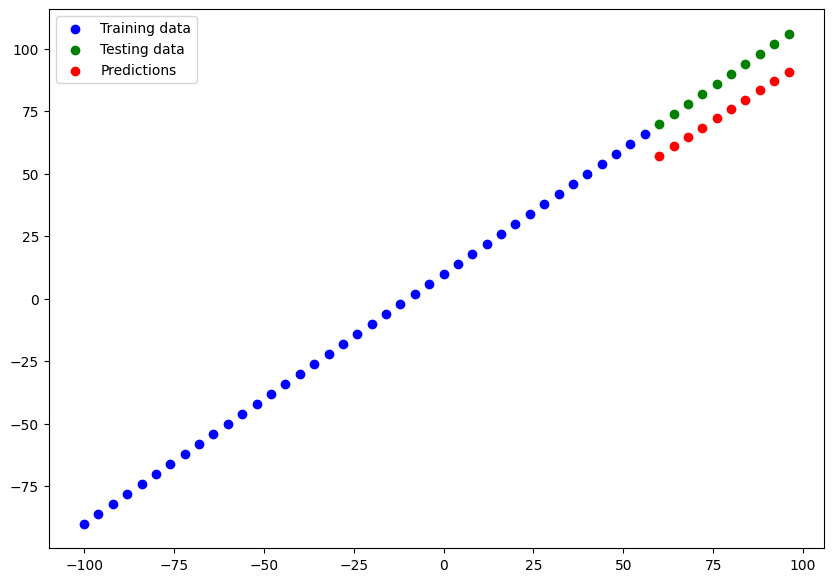

In [68]:
# Make a plot predictions for model_1
y_preds_model_1=model1.predict(x_test)
plot_predictions(predictions=y_preds_model_1)

In [69]:
# calculate model_q evaluation metrics
mae_1=mae(y_test,y_preds_model_1)
mse_1=mse(y_test,y_preds_model_1)
mae_1,mse_1

(np.float32(13.9761), np.float32(195.96358))

In [70]:
# Model 2
# 1. Create a model
tf.random.set_seed(42)
# 1. Create the model
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
# 3. Fit the model
model2.fit(x_train,y_train,epochs=100,verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


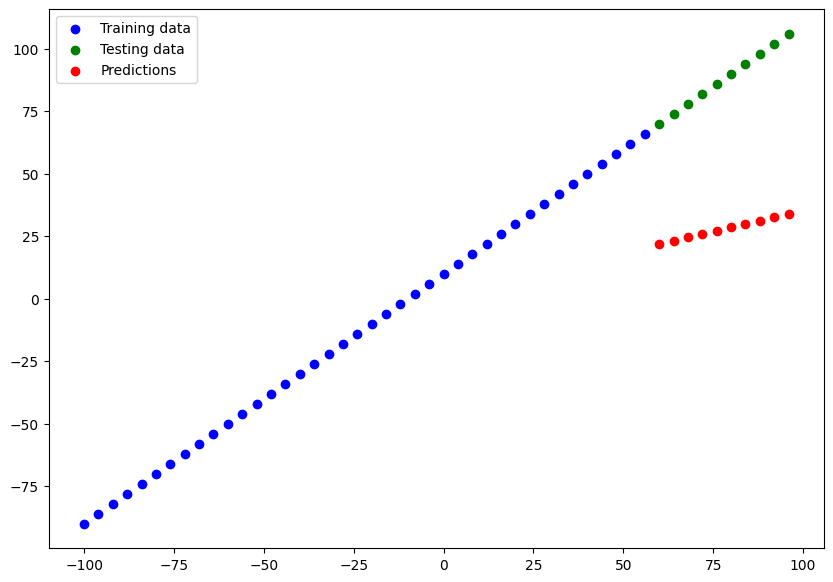

In [71]:
# Make a plot predictions for model_2
y_preds_model_2=model2.predict(x_test)
plot_predictions(predictions=y_preds_model_2)

In [72]:
# calculate model_2 evaluation metrics
mae_2=mae(y_test,y_preds_model_2)
mse_2=mse(y_test,y_preds_model_2)
mae_2,mse_2

(np.float32(60.086037), np.float32(3668.6704))

In [73]:
# Model 3
# 1. Create a model
tf.random.set_seed(42)
# 1. Create the model
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
# 3. Fit the model
model3.fit(x_train,y_train,epochs=500,verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


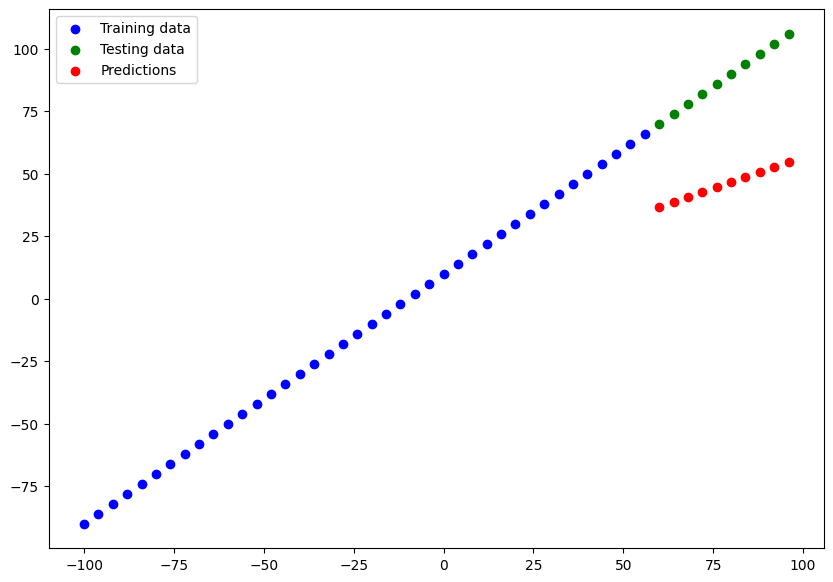

In [74]:
# Make a plot predictions for model_3
y_preds_model_3=model3.predict(x_test)
plot_predictions(predictions=y_preds_model_3)

In [75]:
# calculate model_3 evaluation metrics
mae_3=mae(y_test,y_preds_model_3)
mse_3=mse(y_test,y_preds_model_3)
mae_3,mse_3

(np.float32(42.3536), np.float32(1825.8701))

### Note:
> you should start with small experiments(small models) and make sure they work well and then increase their scale when necessary

# Comparing Model1,Model2,Model3's Performance



In [76]:
# Let's compare our  models performance using a pandas Dataframe
import pandas as pd
model_results=[["model_1",mae_1,mse_1], # list of lists
               ["model_2",mae_2,mse_2],
               ["model_3",mae_3,mse_3]
               ]
all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])

In [77]:
all_results

model        mae          mse
0  model_1  13.976100   195.963577
1  model_2  60.086037  3668.670410
2  model_3  42.353600  1825.870117

In [78]:
model3.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Here we have 2 dense layers 1st with 50 hidden neurons and then the next layer have 1 hidden neurons

# Saving our Models

There are 2 main formats we can save our models with
- the SavedModel format
- the HDF5 format

In [79]:
#save model using the SavedModel format
model3.export("best_saved_model")

Saved artifact at 'best_saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_31')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137997338066192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137997338063888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137997338065616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137997338061776: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [80]:
# save model using the HDF5 format
model2.save("best_HDF5_model.h5")

# Loading the saved Model


In [81]:
from keras.layers import TFSMLayer

loaded_saved_model = TFSMLayer("best_saved_model", call_endpoint="serving_default")
model3.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [82]:
 model3 == loaded_saved_model

False

# Downloading a Model/ any other file from Google Colab

In [83]:
# writing code to download a model
from google.colab import files
files.download("/content/best_HDF5_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
# save a file from google colab to google drive(requires mounting google drive)
!cp /content/best_HDF5_model.h5 /content/drive/MyDrive/Deep_Learning

In [86]:
!ls /content/drive/MyDrive/Deep_Learning

best_HDF5_model.h5


# A larger Example

In [87]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [88]:
# Read the insurance dataset
insurance_data=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [89]:
# onehot encoding
insurance_onehot=pd.get_dummies(insurance_data)
insurance_onehot.head()


age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400        True     False      False   
1   18  33.770         1   1725.55230       False      True       True   
2   28  33.000         3   4449.46200       False      True       True   
3   33  22.705         0  21984.47061       False      True       True   
4   32  28.880         0   3866.85520       False      True       True   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0        True             False             False             False   
1       False             False             False              True   
2       False             False             False              True   
3       False             False              True             False   
4       False             False              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             False  
4             False

In [90]:
# split into train_x,train_y,text_x,test_y

# Create X and y values
X = insurance_onehot.drop("charges", axis=1)
y = insurance_onehot["charges"]
X.head()

age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0        True     False      False        True   
1   18  33.770         1       False      True       True       False   
2   28  33.000         3       False      True       True       False   
3   33  22.705         0       False      True       True       False   
4   32  28.880         0       False      True       True       False   

   region_northeast  region_northwest  region_southeast  region_southwest  
0             False             False             False              True  
1             False             False              True             False  
2             False             False              True             False  
3             False              True             False             False  
4             False              True             False             False

In [91]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [92]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split into training and test sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to confirm
print(f"train_x shape: {train_x.shape}")
print(f"test_x shape: {test_x.shape}")
print(f"train_y shape: {train_y.shape}")
print(f"test_y shape: {test_y.shape}")

train_x shape: (1070, 11)
test_x shape: (268, 11)
train_y shape: (1070,)
test_y shape: (268,)


In [93]:
# build a neural network (sort of like model3 above)
tf.random.set_seed(42)
# 1. create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
# 3.Fit the model
insurance_model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 13290.4766 - mae: 13290.4766
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13177.3711 - mae: 13177.3711
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12949.9414 - mae: 12949.9414
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12470.2969 - mae: 12470.2969
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11576.5947 - mae: 11576.5947
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10226.8457 - mae: 10226.8457
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8742.7178 - mae: 8742.7178
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7674.9902 - mae: 7674.9902
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7406.6606 - mae: 7406.6606
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7369.1182 - mae: 7369.1182
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7348.0508 - mae: 7348.0508
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━

In [94]:
# evaluate the models accuracy
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 5053.1050 - mae: 5053.1050


[4903.18212890625, 4903.18212890625]

In [95]:
y_train.mean()

np.float64(13346.089736364485)

In [96]:
model3.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Let's Try to improve the model

1. Add an extra layer with more hidden units
2. Train for longer
3. Experiment with learning Rate


In [97]:
# Model 2
tf.random.set_seed(42)
insurance_model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])
insurance_model2.fit(X_train,y_train,epochs=100,verbose=2)

Epoch 1/100
34/34 - 3s - 97ms/step - loss: 13283.5986 - mae: 13283.5986
Epoch 2/100
34/34 - 0s - 4ms/step - loss: 13060.9951 - mae: 13060.9951
Epoch 3/100
34/34 - 0s - 3ms/step - loss: 12360.0986 - mae: 12360.0986
Epoch 4/100
34/34 - 0s - 4ms/step - loss: 10522.2920 - mae: 10522.2920
Epoch 5/100
34/34 - 0s - 3ms/step - loss: 8000.1382 - mae: 8000.1382
Epoch 6/100
34/34 - 0s - 3ms/step - loss: 7418.0723 - mae: 7418.0723
Epoch 7/100
34/34 - 0s - 3ms/step - loss: 7381.8125 - mae: 7381.8125
Epoch 8/100
34/34 - 0s - 3ms/step - loss: 7346.0171 - mae: 7346.0171
Epoch 9/100
34/34 - 0s - 3ms/step - loss: 7313.3193 - mae: 7313.3193
Epoch 10/100
34/34 - 0s - 4ms/step - loss: 7279.5005 - mae: 7279.5005
Epoch 11/100
34/34 - 0s - 4ms/step - loss: 7244.2603 - mae: 7244.2603
Epoch 12/100
34/34 - 0s - 3ms/step - loss: 7208.6162 - mae: 7208.6162
Epoch 13/100
34/34 - 0s - 3ms/step - loss: 7171.1484 - mae: 7171.1484
Epoch 14/100
34/34 - 0s - 4ms/step - loss: 7132.5317 - mae: 7132.5317
Epoch 15/100
34/34 -

In [98]:
insurance_model2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3540.2720 - mae: 3540.2720


[3474.52685546875, 3474.52685546875]

In [99]:
# Model 3
tf.random.set_seed(42)
insurance_model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])
history3=insurance_model3.fit(X_train,y_train,epochs=500,verbose=2)

Epoch 1/500
34/34 - 2s - 62ms/step - loss: 13297.2461 - mae: 13297.2461
Epoch 2/500
34/34 - 0s - 3ms/step - loss: 13044.4805 - mae: 13044.4805
Epoch 3/500
34/34 - 0s - 3ms/step - loss: 12183.4473 - mae: 12183.4473
Epoch 4/500
34/34 - 0s - 4ms/step - loss: 9990.9570 - mae: 9990.9570
Epoch 5/500
34/34 - 0s - 4ms/step - loss: 7713.8066 - mae: 7713.8066
Epoch 6/500
34/34 - 0s - 3ms/step - loss: 7446.3794 - mae: 7446.3794
Epoch 7/500
34/34 - 0s - 5ms/step - loss: 7403.9790 - mae: 7403.9790
Epoch 8/500
34/34 - 0s - 4ms/step - loss: 7364.5400 - mae: 7364.5400
Epoch 9/500
34/34 - 0s - 4ms/step - loss: 7326.5874 - mae: 7326.5874
Epoch 10/500
34/34 - 0s - 3ms/step - loss: 7287.5537 - mae: 7287.5537
Epoch 11/500
34/34 - 0s - 4ms/step - loss: 7248.1309 - mae: 7248.1309
Epoch 12/500
34/34 - 0s - 3ms/step - loss: 7205.7974 - mae: 7205.7974
Epoch 13/500
34/34 - 0s - 4ms/step - loss: 7163.3071 - mae: 7163.3071
Epoch 14/500
34/34 - 0s - 3ms/step - loss: 7117.2524 - mae: 7117.2524
Epoch 15/500
34/34 - 0

In [100]:
insurance_model3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3219.0881 - mae: 3219.0881


[3171.7724609375, 3171.7724609375]

### Lets expeirment with the learning rate

In [101]:
# Model 4

tf.random.set_seed(42)
insurance_model4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model4.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                         metrics=["mae"])
insurance_model4.fit(X_train,y_train,epochs=500,verbose=0)

In [102]:
insurance_model4.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5249.1948 - mae: 5249.1948


[5090.7685546875, 5090.7685546875]

In [103]:
# Model 5

tf.random.set_seed(42)
insurance_model5=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model5.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                         metrics=["mae"])
history5=insurance_model5.fit(X_train,y_train,epochs=200,verbose=0)

In [104]:
insurance_model5.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 6896.3604 - mae: 6896.3604


[6724.35986328125, 6724.35986328125]

# Plotting History

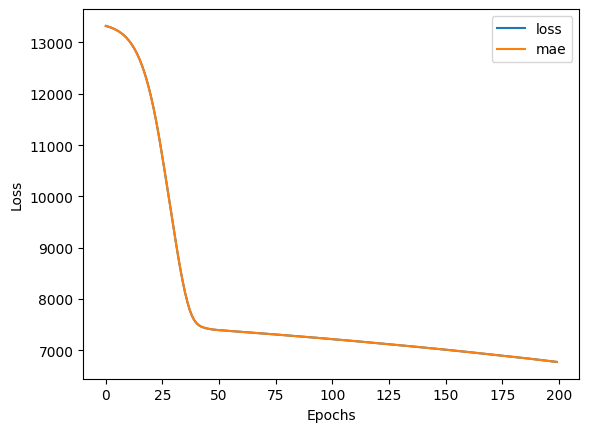

In [105]:
# plot history (also known as a loss curve or a training curve)

history_df5 = pd.DataFrame(history5.history)

history_df5.plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

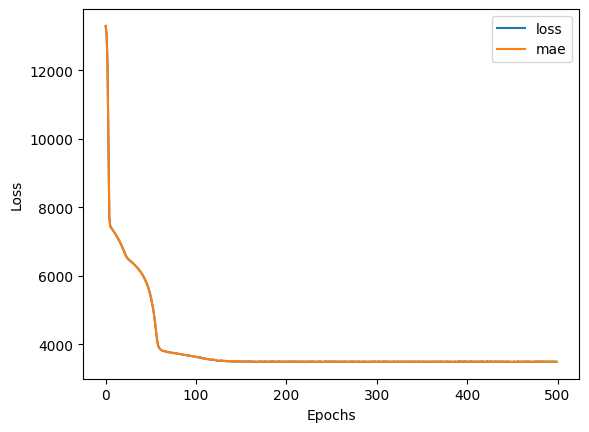

In [106]:
# plot history (also known as a loss curve or a training curve)

history_df3 = pd.DataFrame(history3.history)

history_df3.plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

# EarlyStopping callbacks

Epoch 1/500
27/27 - 7s - 259ms/step - loss: 13146.5967 - mae: 13146.5967 - val_loss: 13902.8135 - val_mae: 13902.8135
Epoch 2/500
27/27 - 1s - 43ms/step - loss: 13042.7559 - mae: 13042.7559 - val_loss: 13766.4727 - val_mae: 13766.4727
Epoch 3/500
27/27 - 0s - 9ms/step - loss: 12857.8652 - mae: 12857.8652 - val_loss: 13514.3408 - val_mae: 13514.3408
Epoch 4/500
27/27 - 0s - 10ms/step - loss: 12523.1748 - mae: 12523.1748 - val_loss: 13072.0459 - val_mae: 13072.0459
Epoch 5/500
27/27 - 0s - 5ms/step - loss: 11961.0811 - mae: 11961.0811 - val_loss: 12358.9355 - val_mae: 12358.9355
Epoch 6/500
27/27 - 0s - 6ms/step - loss: 11101.7363 - mae: 11101.7363 - val_loss: 11320.6367 - val_mae: 11320.6367
Epoch 7/500
27/27 - 0s - 10ms/step - loss: 9980.6055 - mae: 9980.6055 - val_loss: 10105.0361 - val_mae: 10105.0361
Epoch 8/500
27/27 - 0s - 5ms/step - loss: 8782.8320 - mae: 8782.8320 - val_loss: 8953.4033 - val_mae: 8953.4033
Epoch 9/500
27/27 - 0s - 6ms/step - loss: 7804.7461 - mae: 7804.7461 - va

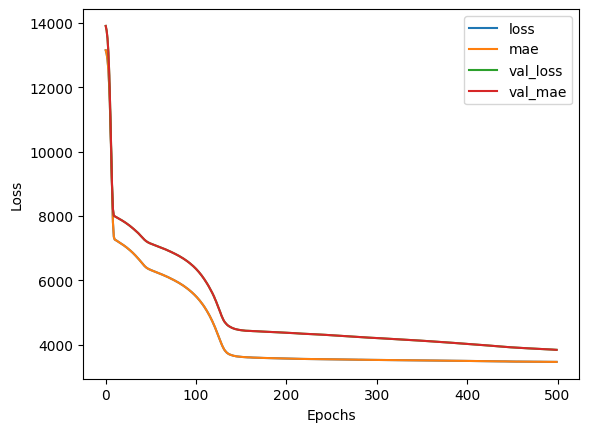

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
# Model with Early Stopping Callback
tf.random.set_seed(42)

# Create the model
insurance_model_early_stopping = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_early_stopping.compile(loss=tf.keras.losses.mae,
                                       optimizer=tf.keras.optimizers.Adam(),
                                       metrics=["mae"])

# Define the Early Stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

# Fit the model with the callback
# We need validation data for early stopping to work
# Let's use a split of the training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


history_early_stopping = insurance_model_early_stopping.fit(
    X_train_split,
    y_train_split,
    epochs=500,
    verbose=2,
    validation_data=(X_val, y_val), # Provide validation data
    callbacks=[early_stopping_callback]
)

# Evaluate the model on the test set
insurance_model_early_stopping.evaluate(X_test, y_test)

# Plot history
history_df_early_stopping = pd.DataFrame(history_early_stopping.history)

history_df_early_stopping.plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

# Preprocessing Data (Normalisation & Standardization)

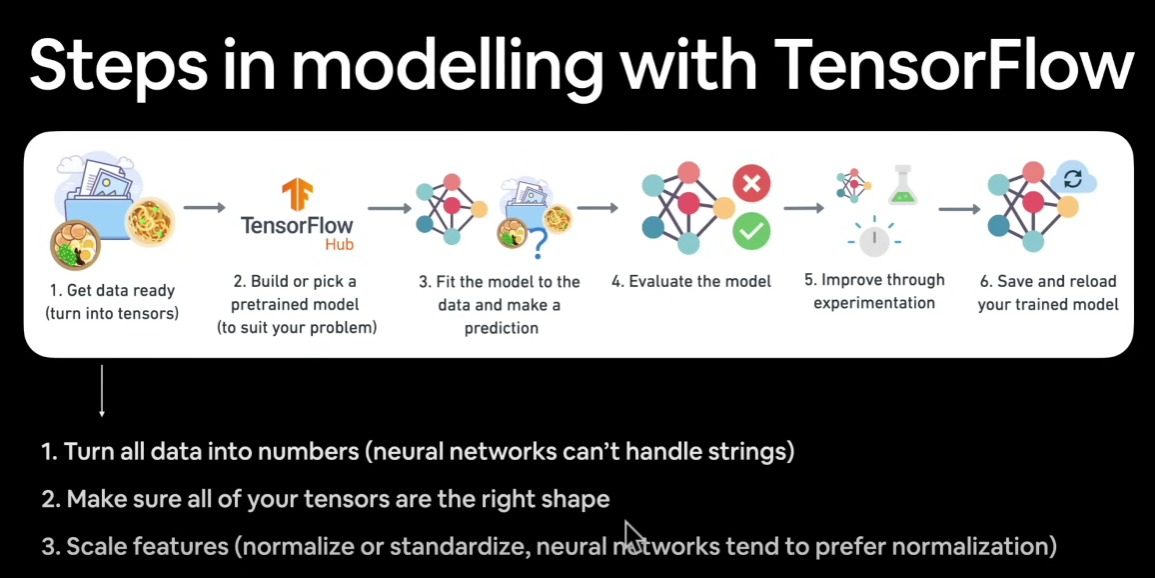

>In terms of scaling values,neural  networks tend to prefer `normalization`.
but you can try both and see which performs better

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance dataset
insurance_data=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [109]:
X.head()

age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0        True     False      False        True   
1   18  33.770         1       False      True       True       False   
2   28  33.000         3       False      True       True       False   
3   33  22.705         0       False      True       True       False   
4   32  28.880         0       False      True       True       False   

   region_northeast  region_northwest  region_southeast  region_southwest  
0             False             False             False              True  
1             False             False              True             False  
2             False             False              True             False  
3             False              True             False             False  
4             False              True             False             False

<Axes: >

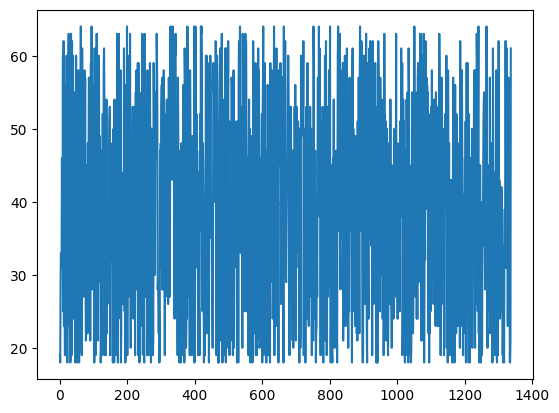

In [110]:
X["age"].plot()

<Axes: ylabel='Frequency'>

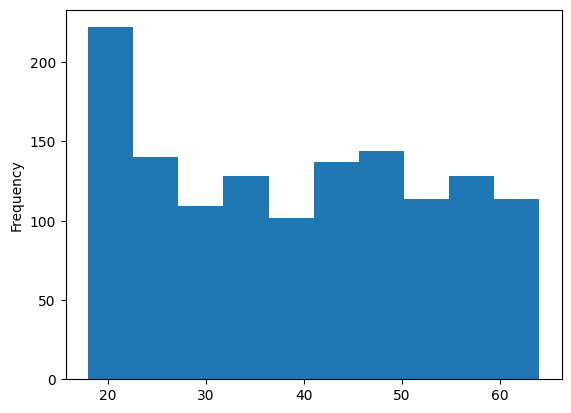

In [111]:
X["age"].plot(kind="hist")

<Axes: >

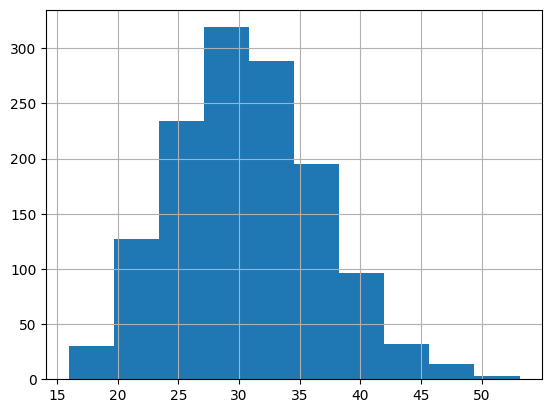

In [112]:
X["bmi"].hist()

In [113]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [114]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
# create x & y
X=insurance_data.drop("charges",axis=1)
y=insurance_data["charges"]

# split our train-test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)


In [115]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [116]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

#### So Beautiful ! Our Data has been normalized and onehot encoded . Now let's build a neural network on it !!!

In [117]:
# Build a Neural Network  Model to Fit our Normalized and one hot encoded data
tf.random.set_seed(42)
# 1. Create the model
insurance_model_normal = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_normal.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])

# 3. Fit the model
history_normal=insurance_model_normal.fit(X_train_normal, y_train, epochs=100, verbose=0)


This is one of the main benefits of Normalization: `faster convergence time` (a fancy way of saying, your model gets to better results faster).

In [118]:
# 4. Evaluate the model
insurance_model_normal.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 3221.3591 - mae: 3221.3591


[3162.62255859375, 3162.62255859375]

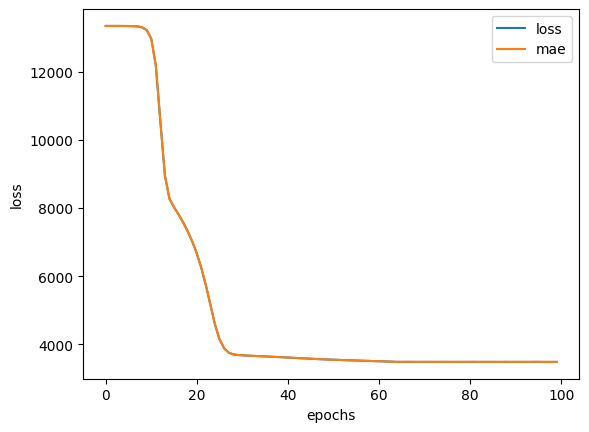

In [119]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_normal.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # Note: epochs will start from 0